In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier


In [20]:
df_train = pd.read_csv('Google_Stock_Price_Train.csv')
df_test = pd.read_csv('Google_Stock_Price_Test.csv')


In [21]:
df_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [22]:
df_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [24]:
df_train = df_train.iloc[:,1:2]

print('training data size : {}'.format(df_train.shape))
#print('testing data size : {}'.format(df_test.shape))


training data size : (1258, 1)


In [25]:
df_test = df_test.iloc[:,1:2]
print('testing data size : {}'.format(df_test.shape))

testing data size : (21, 1)


In [26]:
df_train

,Open
0,325.25
1,331.27
2,329.83
3,328.34
4,322.04
...,...
1253,790.90
1254,790.68
1255,793.70
1256,783.33


In [27]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
train_scaled = sc.fit_transform(df_train)

# Creating a data structure with 20 timesteps and t+1 output
x_train = []
y_train = []

for i in range(20, 1258):
    x_train.append(train_scaled[i-20:i, 0])
    y_train.append(train_scaled[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [28]:
print(x_train.shape, y_train.shape)

(1238, 20) (1238,)


In [32]:
# Reshaping
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [33]:
print(x_train.shape)

(1238, 20, 1)


# 3-layer LSTM

In [34]:
# 3-layer RNN
reg_rnn = Sequential()
reg_rnn.add(LSTM(units = 4, return_sequences = True, input_shape = (None, 1)))
reg_rnn.add(LSTM(units = 4, return_sequences = True))
reg_rnn.add(LSTM(units = 4 ))
reg_rnn.add(Dense(units = 1))
reg_rnn.compile(optimizer = 'adam', loss = 'mean_squared_error')
reg_rnn.fit(x_train, y_train, batch_size = 5, epochs = 100)


Epoch 1/100
248/248 [==============================] - 13s 27ms/step - loss: 0.0791
Epoch 2/100
248/248 [==============================] - 7s 28ms/step - loss: 0.0033
Epoch 3/100
248/248 [==============================] - 7s 27ms/step - loss: 0.0027
Epoch 4/100
248/248 [==============================] - 7s 28ms/step - loss: 0.0024
Epoch 5/100
248/248 [==============================] - 7s 27ms/step - loss: 0.0022
Epoch 6/100
248/248 [==============================] - 7s 27ms/step - loss: 0.0020
Epoch 7/100
248/248 [==============================] - 7s 27ms/step - loss: 0.0020
Epoch 8/100
248/248 [==============================] - 7s 27ms/step - loss: 0.0019
Epoch 9/100
248/248 [==============================] - 7s 27ms/step - loss: 0.0018
Epoch 10/100
248/248 [==============================] - 7s 27ms/step - loss: 0.0017
Epoch 11/100
248/248 [==============================] - 7s 27ms/step - loss: 0.0017
Epoch 12/100
248/248 [==============================] - 7s 27ms/step - loss: 0.0016


##predict the stock price

In [35]:
#predict the stock price
real_stock_price = np.concatenate((df_train[0:1258] ,price_test),axis = 0)
scaled_real_stock_price = sc.fit_transform(real_stock_price)
input_x = []
for i in range(1258,1279):
    input_x.append(scaled_real_stock_price[i-20:i, 0]) 

   
input_x = np.array(input_x)
input_x = np.reshape(input_x, (input_x.shape[0], input_x.shape[1], 1) )

predicted_price = reg_rnn.predict(input_x)
predicted_price = sc.inverse_transform(predicted_price)

rmse = math.sqrt(mean_squared_error(real_stock_price[1258:], predicted_price))

## Visualising the results

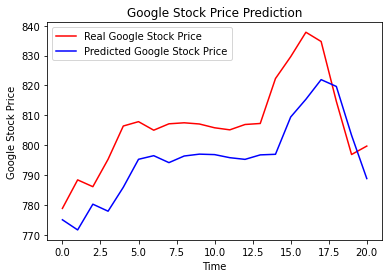

In [37]:
# Visualising the results
plt.plot(real_stock_price[1258:], color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

#4-layer LSTM

In [38]:
# Initialising the RNN
reg_rnn1 = Sequential()
reg_rnn1.add(LSTM(units = 4,  return_sequences = True, activation = 'sigmoid', input_shape = (None, 1)))
reg_rnn1.add(LSTM(units = 4, return_sequences = True))
reg_rnn1.add(LSTM(units = 3))
reg_rnn1.add(Dense(units = 1))
reg_rnn1.compile(optimizer = 'adam', loss = 'mean_squared_error')
reg_rnn1.fit(x_train, y_train, batch_size = 32, epochs = 200)

Epoch 1/200
39/39 [==============================] - 7s 28ms/step - loss: 0.2188
Epoch 2/200
39/39 [==============================] - 1s 29ms/step - loss: 0.0907
Epoch 3/200
39/39 [==============================] - 1s 28ms/step - loss: 0.0803
Epoch 4/200
39/39 [==============================] - 1s 27ms/step - loss: 0.0790
Epoch 5/200
39/39 [==============================] - 1s 28ms/step - loss: 0.0776
Epoch 6/200
39/39 [==============================] - 1s 28ms/step - loss: 0.0754
Epoch 7/200
39/39 [==============================] - 1s 28ms/step - loss: 0.0704
Epoch 8/200
39/39 [==============================] - 1s 28ms/step - loss: 0.0415
Epoch 9/200
39/39 [==============================] - 1s 28ms/step - loss: 0.0038
Epoch 10/200
39/39 [==============================] - 1s 28ms/step - loss: 0.0030
Epoch 11/200
39/39 [==============================] - 1s 29ms/step - loss: 0.0027
Epoch 12/200
39/39 [==============================] - 1s 29ms/step - loss: 0.0027
Epoch 13/200
39/39 [=====

##predict the stock price

In [39]:
#predict the stock price
real_stock_price = np.concatenate((df_train[0:1258] ,price_test),axis = 0)
scaled_real_stock_price = sc.fit_transform(real_stock_price)
input_x = []
for i in range(1258,1279):
    input_x.append(scaled_real_stock_price[i-20:i, 0]) 

   
input_x = np.array(input_x)
input_x = np.reshape(input_x, (input_x.shape[0], input_x.shape[1], 1) )

predicted_price = reg_rnn.predict(input_x)
predicted_price = sc.inverse_transform(predicted_price)

rmse = math.sqrt(mean_squared_error(real_stock_price[1258:], predicted_price))

## Visualising the results

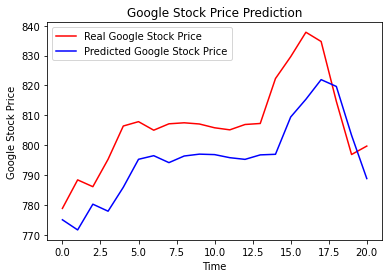

In [40]:
# Visualising the results
plt.plot(real_stock_price[1258:], color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()